## CNN is not a fully connected deep NN; it has two additional layers called convolutional and pooling layers 

In [11]:
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras

In [5]:
china = load_sample_image("china.jpg") /255
flower = load_sample_image("flower.jpg")/255

In [8]:
images = np.array([china, flower])
batch_size ,height, width, channels = images.shape

In [9]:
filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32)
filters[:,3,:,0] = 1 # vertical line
filters[3,:,:,1] = 1 # horizontal line

In [12]:
outputs = tf.nn.conv2d(images,filters,strides=1,padding="SAME")

Metal device set to: Apple M1


2022-01-28 20:15:55.468188: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-28 20:15:55.468978: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


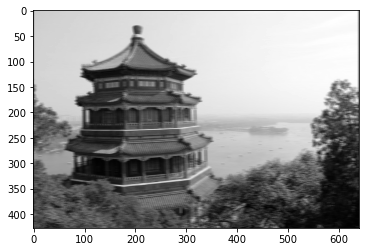

In [24]:
plt.imshow(outputs[0,:,:,1],cmap='gray')
plt.show()

In [29]:
max_pool = keras.layers.MaxPool2D(pool_size=2)
conv = keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding="same",activation="relu")

Depth Pooling

In [30]:
depth_pool = keras.layers.Lambda(lambda x: tf.nn.max_pool(X,ksize=(1,1,1,3),strides=(1,1,1,3),padding="valid"))

## CNN architectures
- MNIST as an example

In [34]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64,kernel_size=7,activation="relu",padding="same",input_shape=(28,28,1)),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(128,3,activation="relu",padding="same"),
    keras.layers.Conv2D(128,3,activation="relu",padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256,3,activation="relu",padding="same"),
    keras.layers.Conv2D(256,3,activation="relu",padding="same"),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(), # 1d structure 
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation="softmax")
])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 256)        

In [37]:
model.compile()